# Project Description

### Task
Fitness center customer churn forecast

* Identify portraits of clients prone to churn and vice versa
* Build an outflow forecasting model
* Consider the most influential features
* Describe the main recommendations for customer retention.

### Table of Contents

### [Step 1. Loading data](#Step_1)
### [Step 2. Performing EDA](#Step_2)
* [Studying Dataset](#Step_2_1)
* [Plotting Graphs](#Step_2_2)
* [Correlation Matrix](#Step_2_3)

### [Step 3. Build a model for predicting customer churn](#Step_3)
* [Train the model](#Step_3_1)
* [Evaluate metrics](#Step_3_2)

### [Step 4. Make client clustering](#Step_4)
* [Build distance Matrix](#Step_4_1)
* [Train clustering model](#Step_4_2)
* [Calculate churn shares](#Step_4_3)

### [Step 5. Formulate conclusions and recommendations](#Step_5)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

<a id = 'Step_1' ></a>
## Step 1. Uploading the data

In [2]:
clients = pd.read_csv('gym_churn.csv')
clients

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


The data set includes the following fields:
* 'Churn' - outflow fact in the current month;


Current fields in the dataset:

Customer data for the previous month before checking the outflow:
* 'gender' - gender;
* 'Near_Location' — living or working in the area where the fitness center is located;
* 'Partner' — an employee of the club's partner company (cooperation with companies whose employees can receive discounts on a subscription — in this case, the fitness center stores information about the client's employer);
* Promo_friends — the fact of the initial entry in the framework of the "bring a friend" promotion (I used a promo code from a friend when paying for the first subscription);
* 'Phone' — presence of a contact phone number;
* 'Age' — age;
* 'Lifetime' — the time since the first visit to the fitness center (in months).


Information based on the log of visits, purchases and information about the current status of the customer's subscription:
* 'Contract_period' — the duration of the current valid subscription (month, 3 months, 6 months, year);
* 'Month_to_end_contract' — the period until the end of the current valid subscription (in months);
* 'Group_visits' — the fact of attending group classes;
* 'Avg_class_frequency_total' — the average frequency of visits per week for the entire time since the start of the subscription;
* 'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month;
* 'Avg_additional_charges_total' — total revenue from other fitness center services: cafes, sports goods, beauty and massage parlors.

# Step 2 . EDA

<a id = 'Step_2_1' > </a>
#### Discovering dataset

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
clients.duplicated().sum()

0

In [5]:
clients.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Average customer:
* lives or works in the area of the fitness center
* leaves a contact phone number
* his subscription is usually from a month to 6
* he may attend group classes
* his age is about 29 years
* he pays more than 100 standard units , but less than 200 standard units for an additional services
* until the end of his subscription, on average, 4 months
* the time since the first visit to the fitness center is more than 3, but less than 4 months
* the average frequency of visits per week for the entire time since the start of the subscription is slightly less than 2 times a week
* the average frequency of visits per week for the previous month is approximately at the same level as for the entire time.

In [6]:
# Let's rename columns
clients = clients.rename(columns = {'Near_Location':'near_location', 'Partner':'partner','Promo_friends':'promo_friends',
                         'Phone':'phone','Contract_period':'contract_period','Group_visits':'group_visits',
                          'Age':'age','Avg_additional_charges_total':'avg_additional_charges_total', 
                          'Month_to_end_contract':'month_to_end_contract', 'Lifetime':'lifetime', 
                         'Avg_class_frequency_total':'avg_class_frequency_total',
                         'Avg_class_frequency_current_month':'avg_class_frequency_current_month',
                         'Churn':'churn'})
clients.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Let's look at the average values of signs in two groups — those who went to the outflow and those who remained

In [7]:
clients.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
clients['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

Taking into account external data that indicate that the proportion of women in fitness clubs is higher, we can conclude that most likely 1-women, 0-men.

Judging by the average values, the fact of outflow is most likely not affected by gender and the presence of a contact phone number.

<a id = 'Step_2_2' > </a>
#### Let's build bar histograms and feature distributions for those who left (edema) and those who stayed (did not get into the outflow).

In [9]:
# Let's divide the variables into categorical and quantitative ones
categorical = ['gender', 'near_location', 'partner', 'promo_friends','phone','group_visits', 'churn']

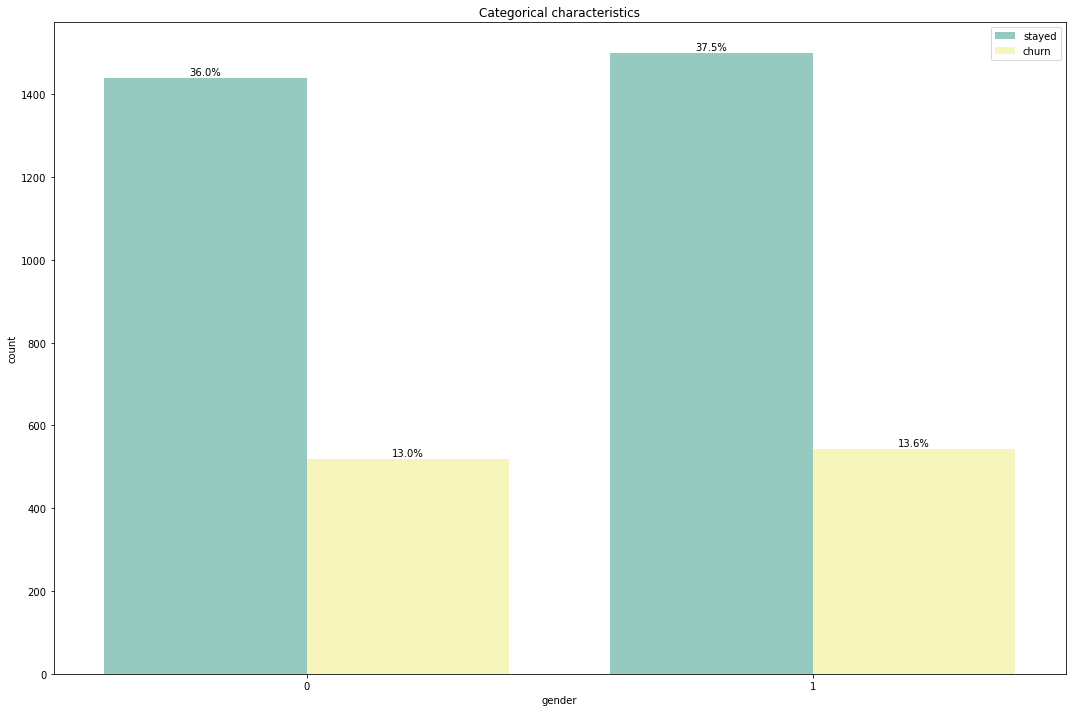

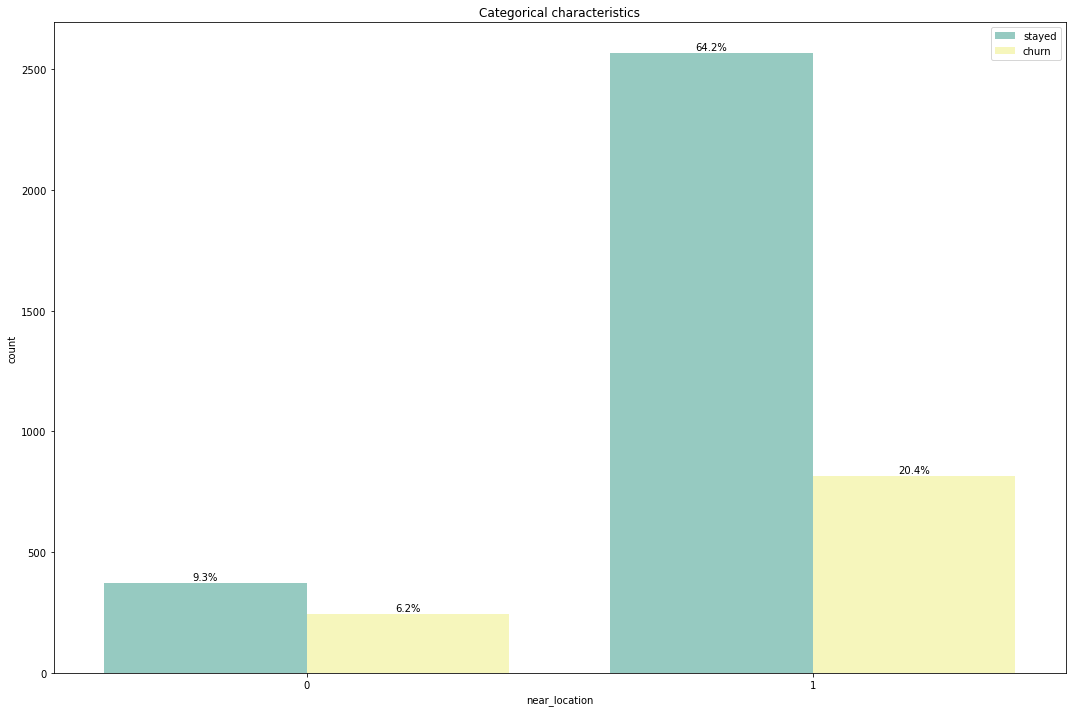

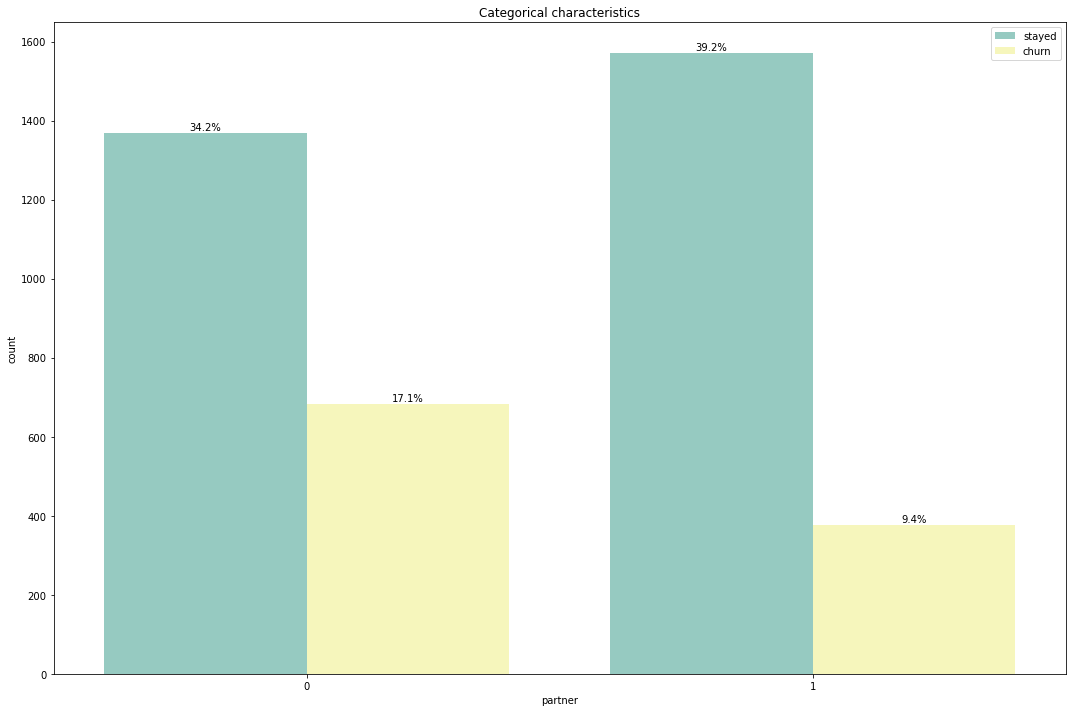

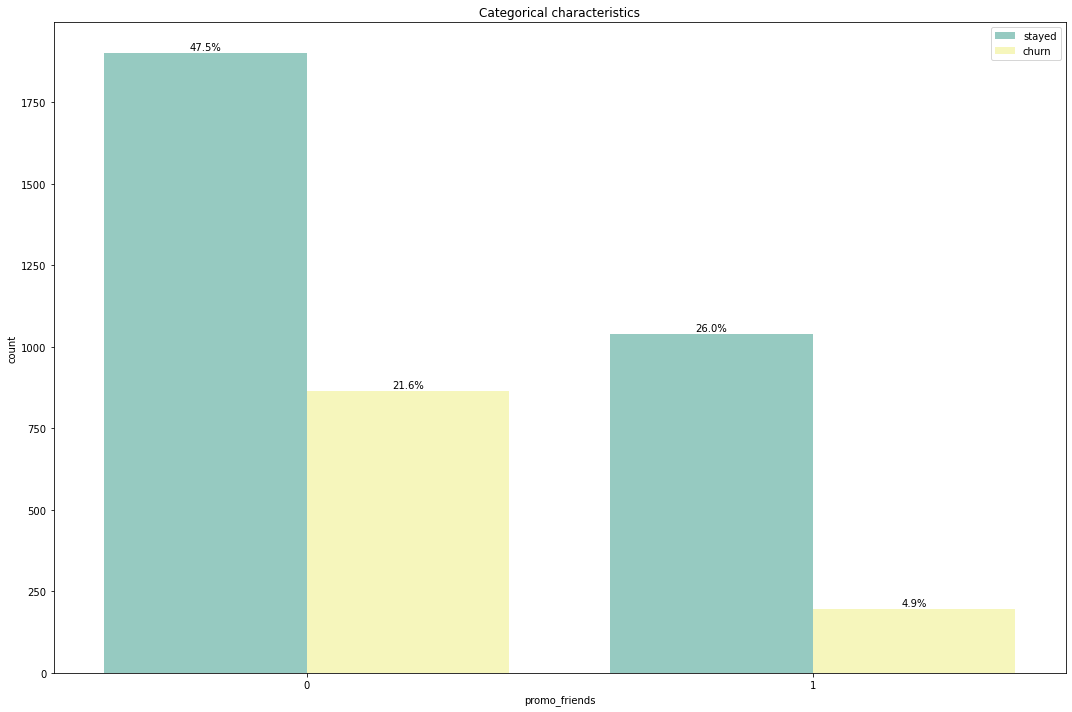

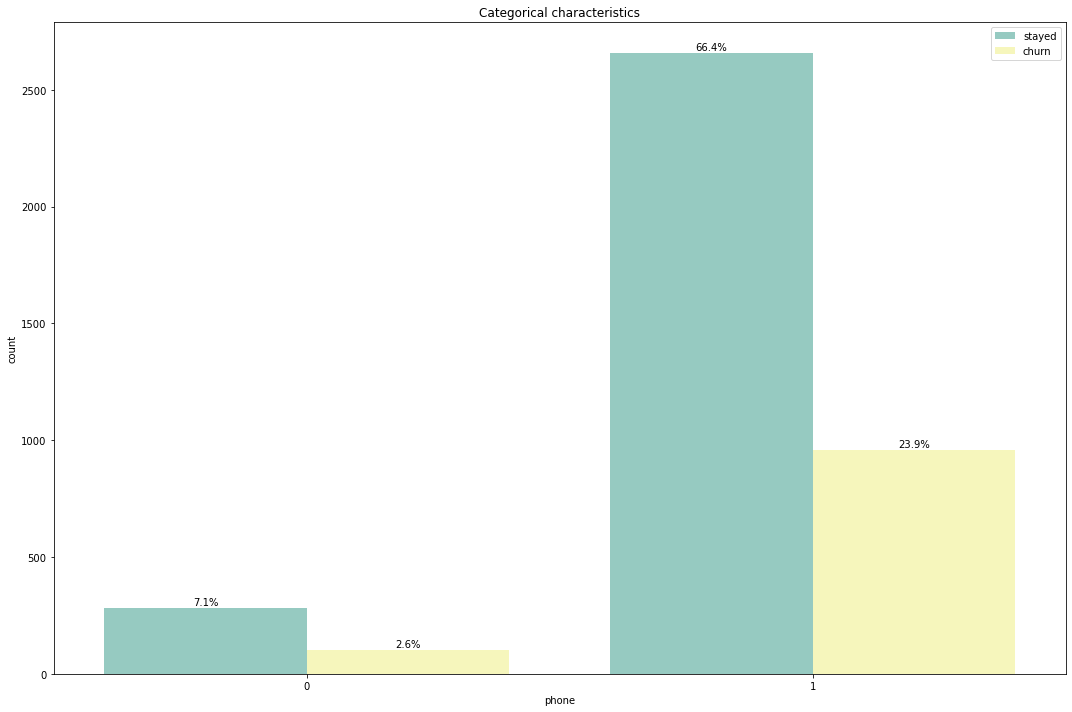

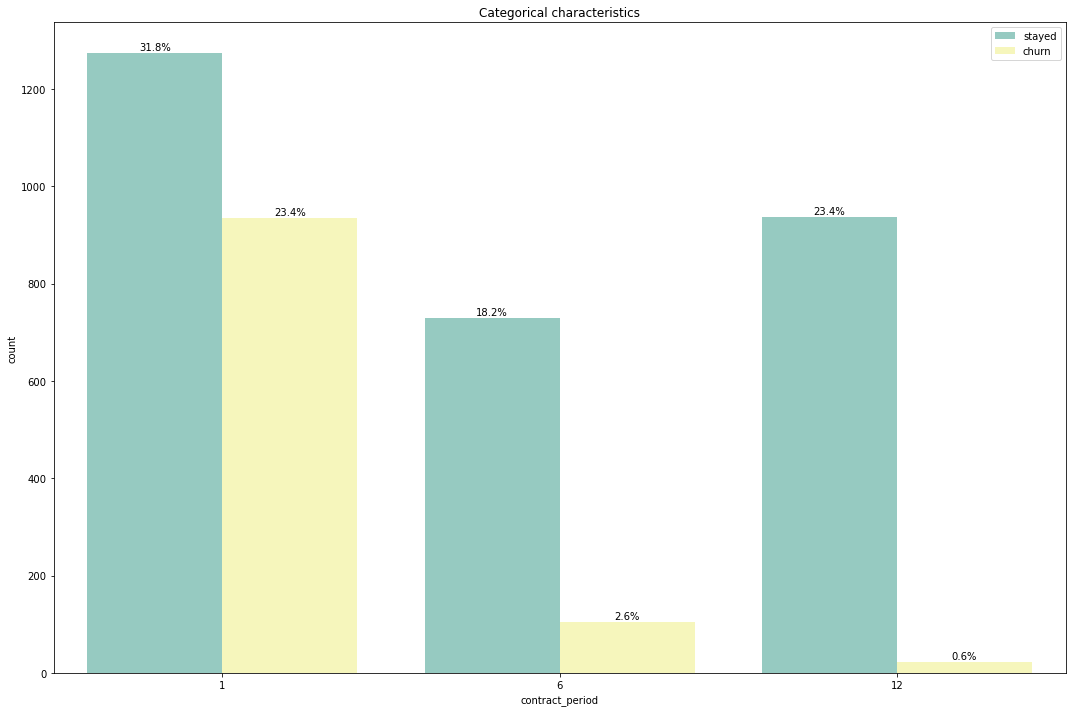

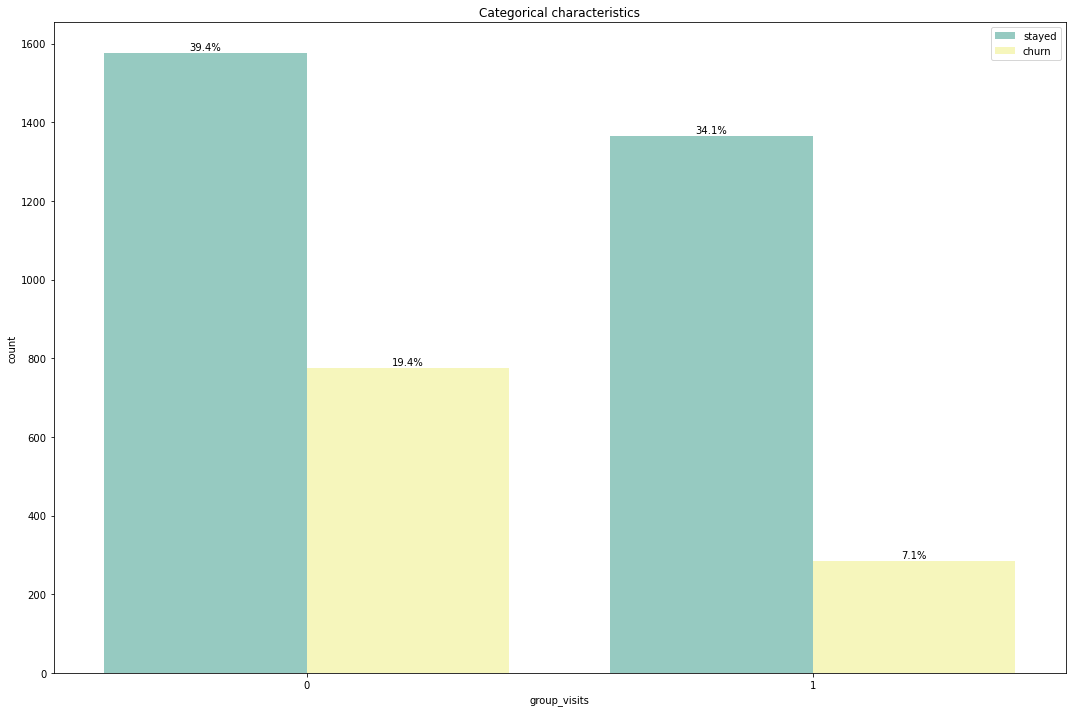

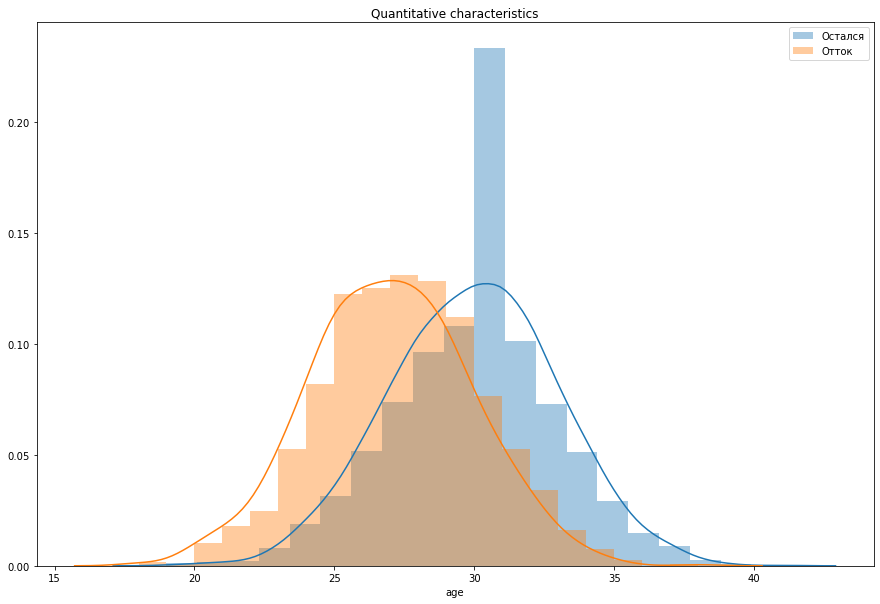

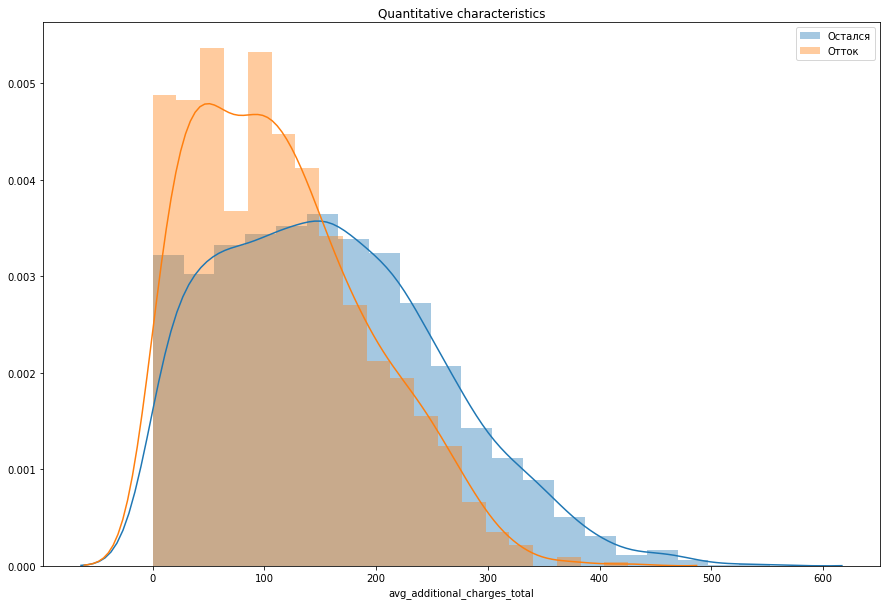

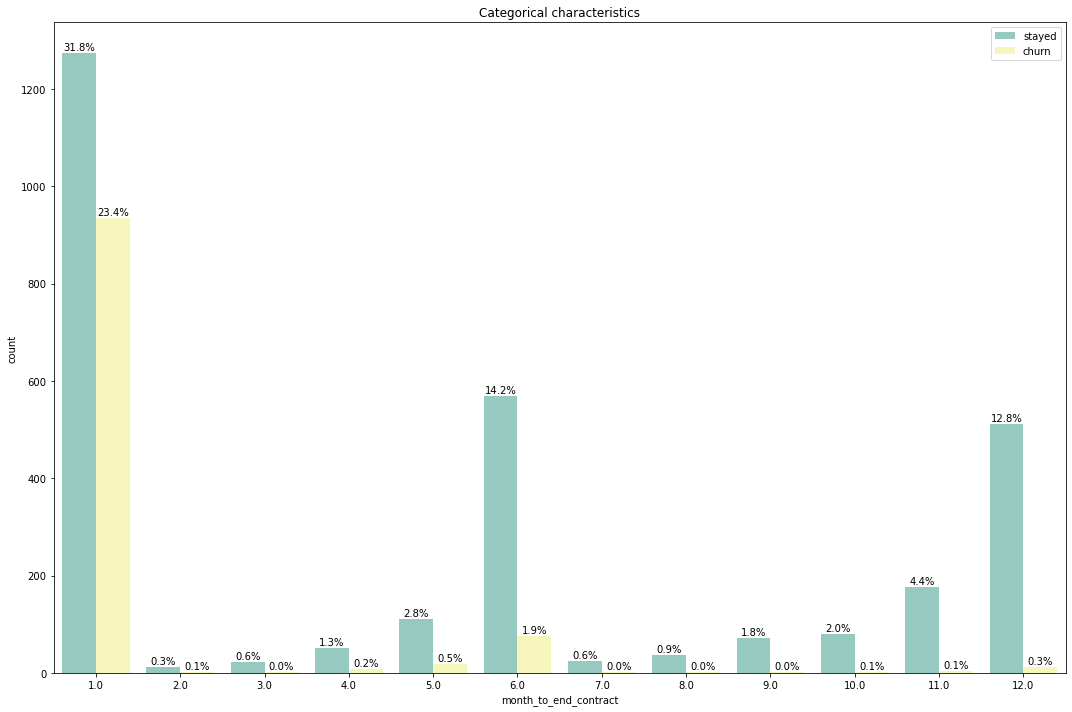

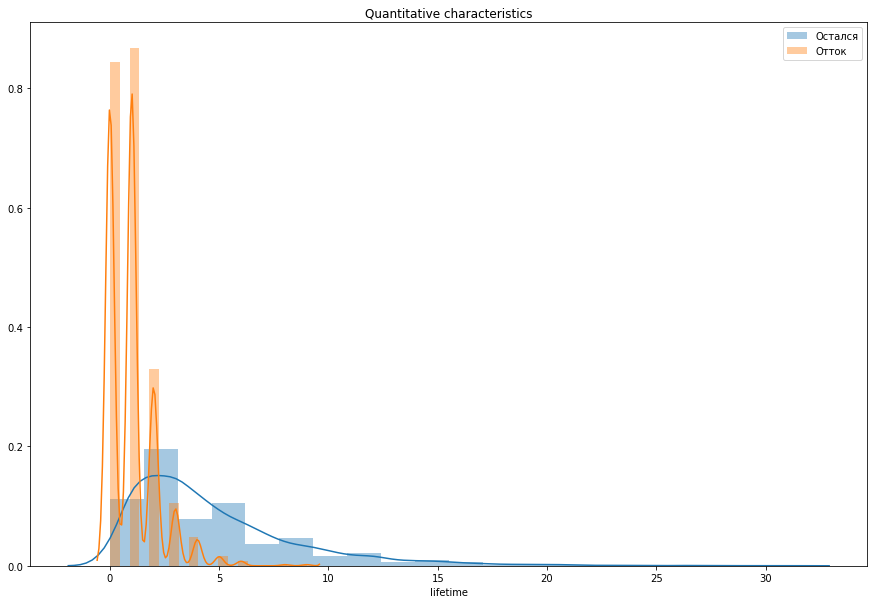

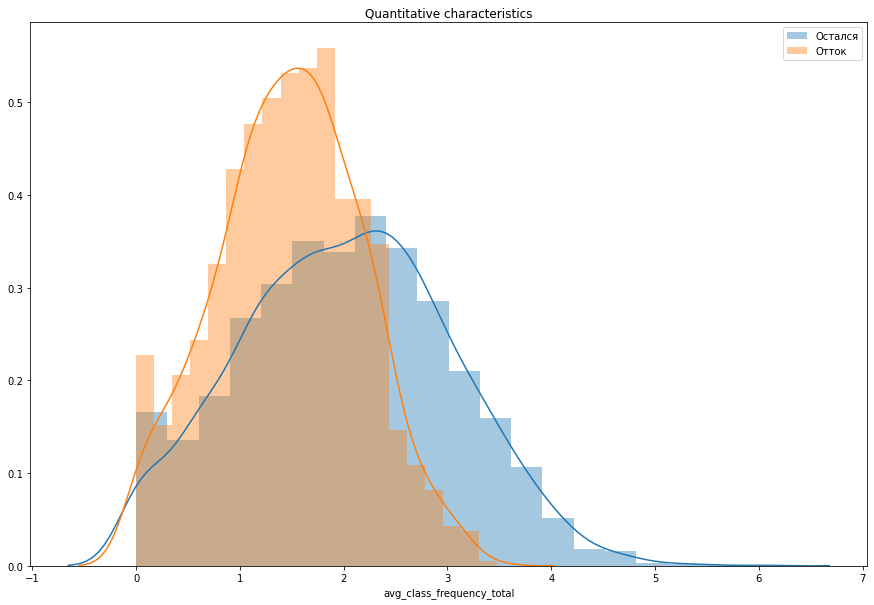

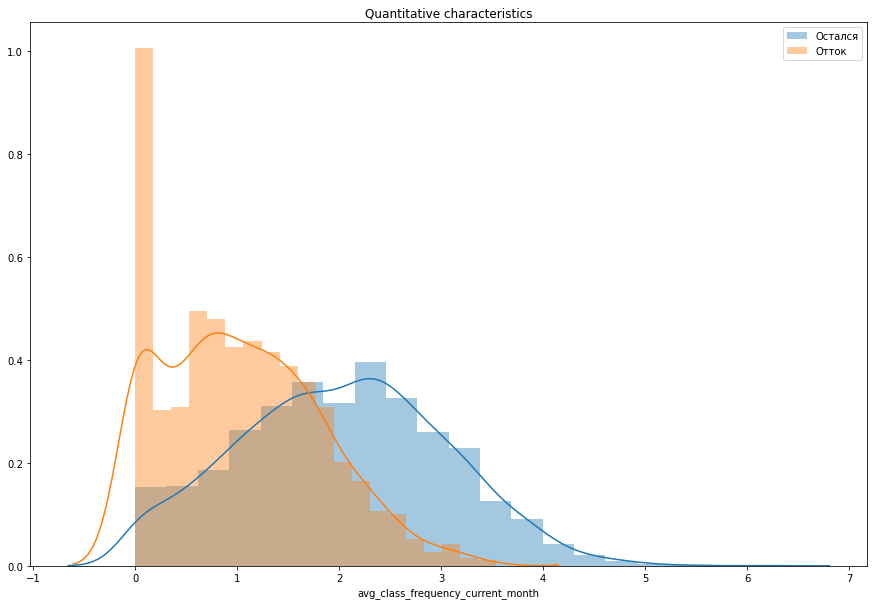

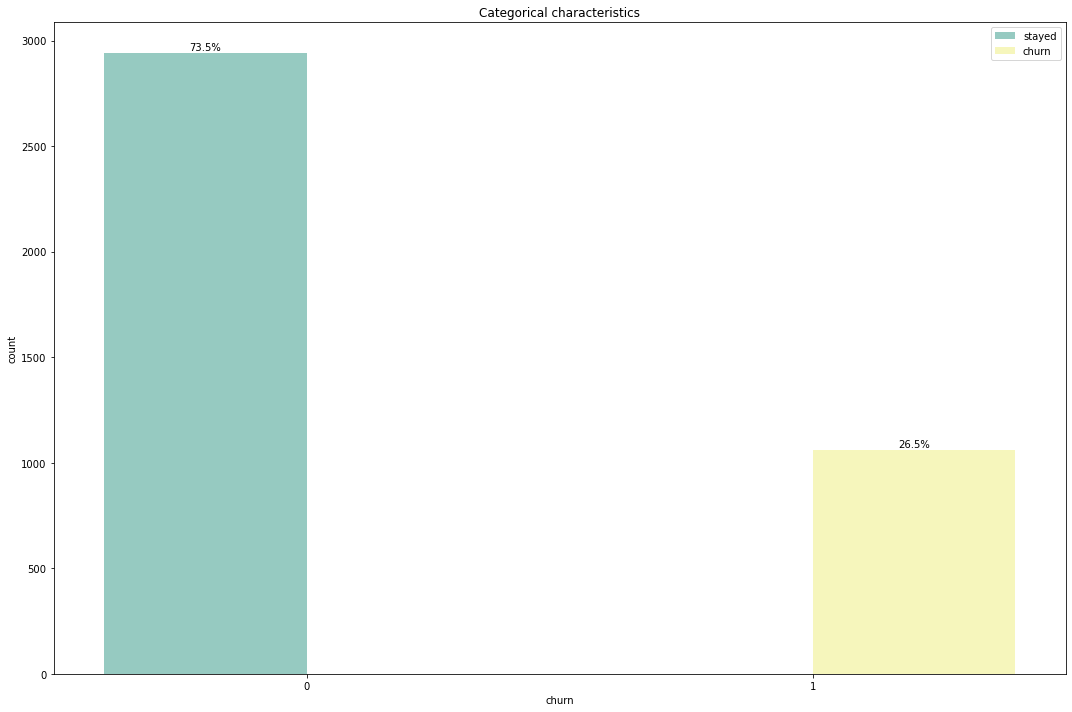

In [10]:
for feature in clients.columns:
    if feature not in categorical and feature not in ['contract_period', 'month_to_end_contract']:
        plt.figure(figsize = (15,10))
        plt.title('Quantitative characteristics')
        sns.distplot(clients[clients['churn'] == 0][feature], bins = 20, label = 'Остался')
        sns.distplot(clients[clients['churn'] == 1][feature], bins = 20, label = 'Отток')
        plt.legend()
        plt.show()                 
    else:
        plt.figure(figsize = (15,10))
        plt.title('Categorical characteristics')
        ax = sns.countplot(clients[feature], hue = clients['churn'], palette="Set3")
        total = len(clients)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout()
        plt.legend(labels = ['stayed','churn'])
        plt.show()

We can see that there are no outliers on the graphs and they are quite representative.
* Judging by the graphs, the fact of outflow does not depend on gender and the presence of a contact phone, while more than 70 percent of customers in the dataframe did not get into outflow.
* * It can also be seen that living or working in the area of the fitness center greatly reduces the likelihood of outflow.
* From the graph of the attribute "employee of the partner company of the club", it can be seen that the fact that if the client is an employee of the company, this has a positive effect on the outflow, the percentage of those who remain increases, and those who leave, on the contrary, falls.
* The longer the subscription duration, the better the outflow ratio looks/stayed.
* Customers who attend group classes also seem to be less likely to get into the outflow.
* * The outflow of customers is also high, with 1 month remaining until the end of their season tickets.

According to the graphs of all quantitative indicators, you can see differences in the distributions, which means that they have different effects on the outflow.

<a id = 'Step_2_3' ></a>
#### Let's build a correlation matrix.

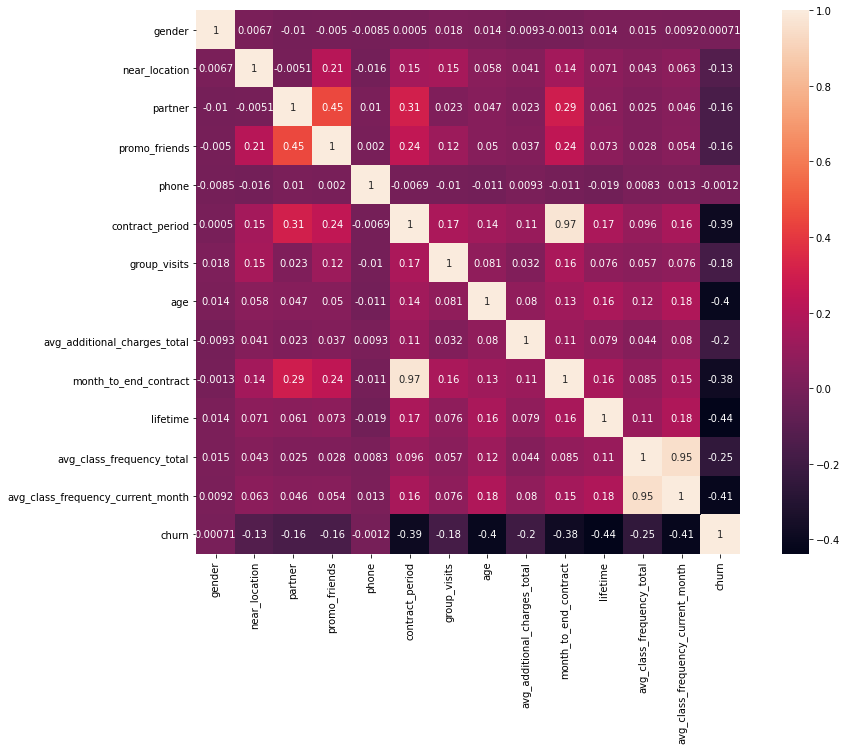

In [11]:
plt.figure(figsize = (15,10))
cm = clients.corr()  
sns.heatmap(cm, annot = True, square=True)
plt.show()

The heat map shows that the dataset contains strongly correlated features(the period until the end of the current active subscription (in months) and the duration of the current active subscription (month, 3 months, 6 months, year); as well as the average frequency of visits per week for all the time since the beginning of the subscription and the average frequency of visits per week for the previous month), we will get rid of them to avoid multicollinearity at the training stage of the model.

In [12]:
clients_new = clients.drop(['avg_class_frequency_total','month_to_end_contract'], axis = 1)
clients_new

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,2,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,3,1.596237,0


### Conclusion
The necessary libraries are imported, the data is loaded, and there are no omissions or duplicates. Visual analysis of the data allows us to draw primary conclusions about the possible absence of a relationship between gender, the presence of a contact phone number and the fact of outflow. Also, judging by the graphs, there are no outliers in the data. The distribution of quantitative features is either normal or tends to be normal. Given all of the above, you can start training models.

<a id = 'Step_3' > </a>
## Step 3. Building an outflow forecasting model

In [13]:
# we divide the data into features (matrix X) and the target variable (y)
X = clients_new.drop('churn', axis = 1)
y = clients_new['churn']

<a id = 'Step_3_1' > </a>
#### Dividing the data into training and validation samples.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Due to the large difference in standard deviations, it is necessary to standardize the data before training the model.

In [15]:
scaler = StandardScaler() 
scaler.fit(X) 
X_train_sc = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

In [16]:
models = [LogisticRegression(random_state = 0), RandomForestClassifier(random_state = 0)]

<a id = 'Step_3_2' > </a>
#### Metrics for the two algorithms

In [17]:
for m in models:
    m.fit(X_train_sc, y_train)
    y_pred = m.predict(X_test_st)
    print('Model: ', type(m).__name__)
    print('Accuracy: {:.2f} precision: {:.2f} recall: {:.2f} '.format(accuracy_score(y_test, y_pred), 
                                                                precision_score(y_test, y_pred),
                                                                recall_score(y_test, y_pred))
                                                                    )
    print()

Model:  LogisticRegression
Accuracy: 0.92 precision: 0.85 recall: 0.84 

Model:  RandomForestClassifier
Accuracy: 0.91 precision: 0.85 recall: 0.77 



### Conclusion
Logistic regression shows a much better proportion of correct answers, and the completeness and accuracy is higher than that of a random forest. In this case, it is most likely that logistic regression should be considered the best based on metrics.
Apparently, the logistic regression algorithm distinguishes the classes from each other better, and the detection of the desired class occurs with greater accuracy.







<a id = 'Step_4' > </a>
## Step 4. Perform client clustering.

Standardizing data

In [18]:
x_sc = scaler.fit_transform(clients_new.drop(columns = ['churn']))

In [19]:
print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121 -0.19332863 -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  0.87368001  0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.46008079 -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237 -0.46008079  1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.19332863 -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.19332863  0.82634551]
 [ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206  0.86426788 -0.54676556 -0.46008079 -0.46525669]
 [-1.0207145   0.42788074 -0.973842   -0.667

<a id = 'Step_4_1' > </a>
#### Let's build a distance matrix and a dendrogram.

In [20]:
linked = linkage(x_sc, method = 'ward') 
print(linked)

[[5.47000000e+02 3.88400000e+03 1.11541554e-02 2.00000000e+00]
 [1.46000000e+03 1.53800000e+03 2.48829986e-02 2.00000000e+00]
 [2.36600000e+03 3.42500000e+03 2.93974563e-02 2.00000000e+00]
 ...
 [7.98400000e+03 7.99500000e+03 8.46938585e+01 2.64900000e+03]
 [7.98500000e+03 7.99600000e+03 8.95369955e+01 3.03500000e+03]
 [7.99200000e+03 7.99700000e+03 9.06663627e+01 4.00000000e+03]]


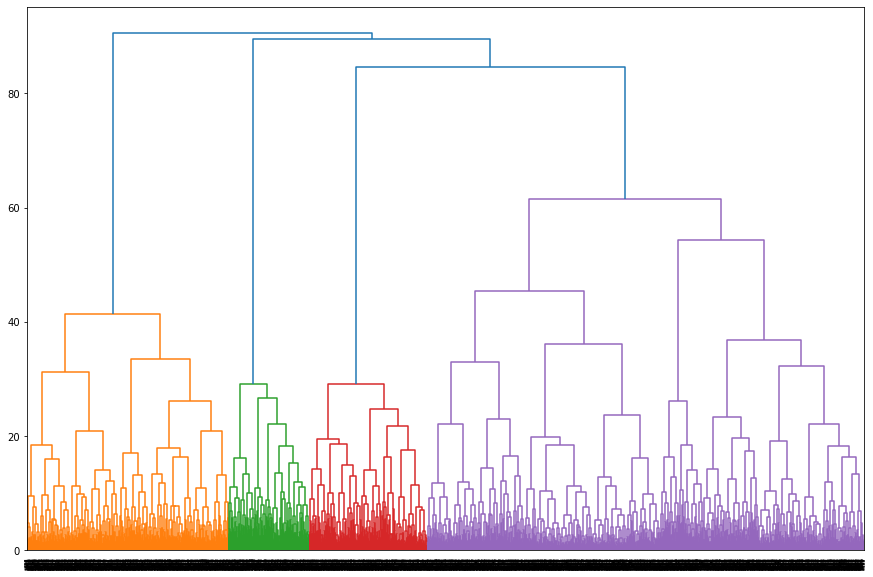

In [21]:
# dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Judging by the resulting dendrogram graph, we can distinguish 5 classes, but the dendrogram function allocates 4.

<a id = 'Step_4_2' ></a>
#### Let's train the clustering model

In [27]:
km = KMeans(n_clusters = 5, random_state = 5) 
labels = km.fit_predict(x_sc)

In [28]:
# Saving cluster labels in the dataset
clients_new['cluster_km'] = labels

Let's examine mean values of features for different clusters.

In [29]:
clients_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.498155,1.000000,0.214022,0.069188,1.0,2.034133,0.293358,27.702030,118.024181,1.926199,1.201385,0.555351
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.496454,0.995947,0.890578,1.000000,1.0,6.910841,0.523810,29.600811,153.546885,4.282675,1.920546,0.119554
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
4,0.538071,0.995939,0.386802,0.010152,1.0,6.278173,0.526904,30.639594,178.787199,5.485279,2.348902,0.013198


Judging by the resulting table, we can say, for example, that gender does not affect the distribution across clusters. Apparently, the main contribution is made by such attributes as: partner, contract_period, age, avg_additional_charges_total, lifetime.

Let's build feature distributions for clusters.

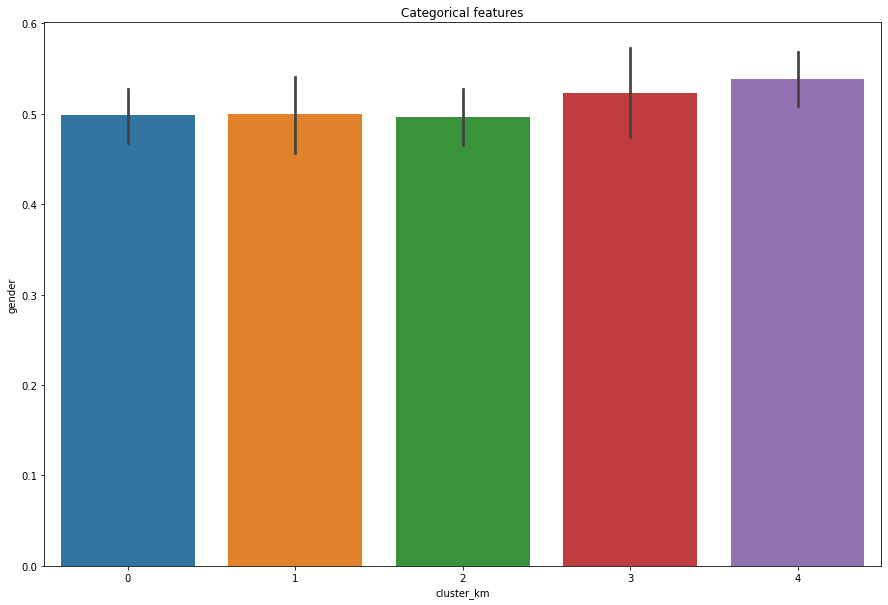

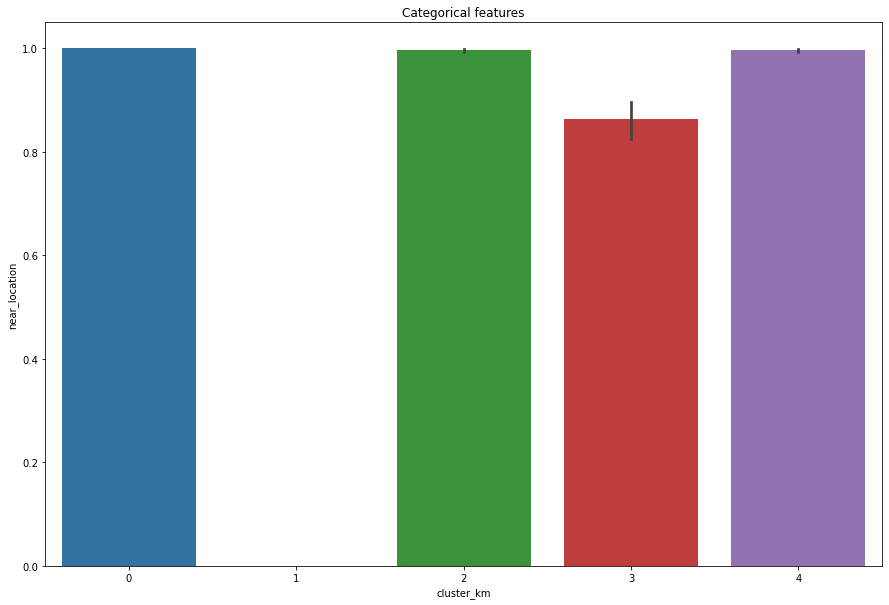

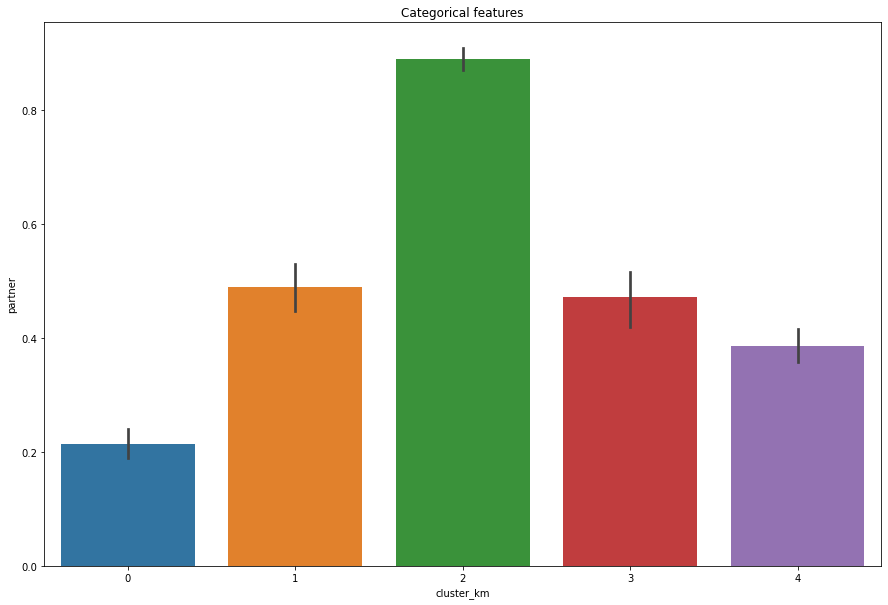

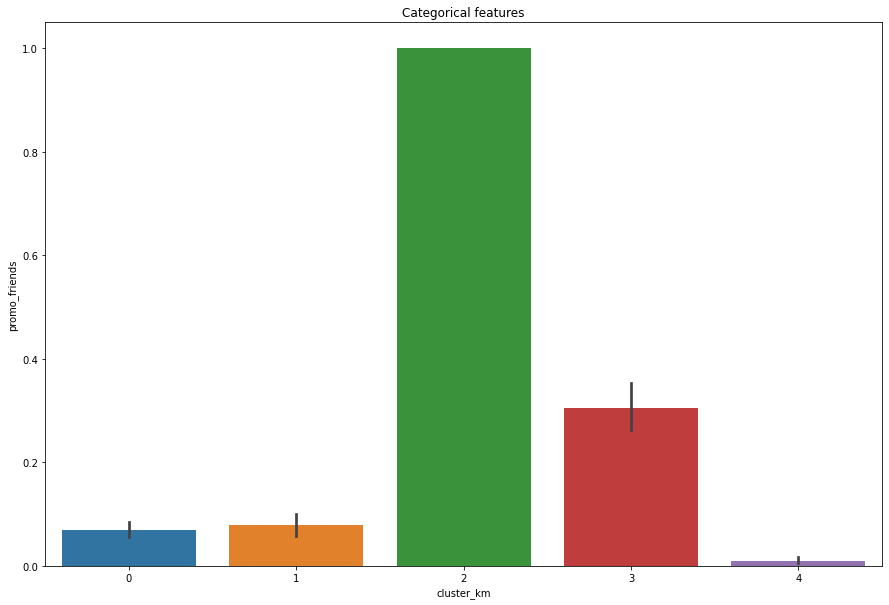

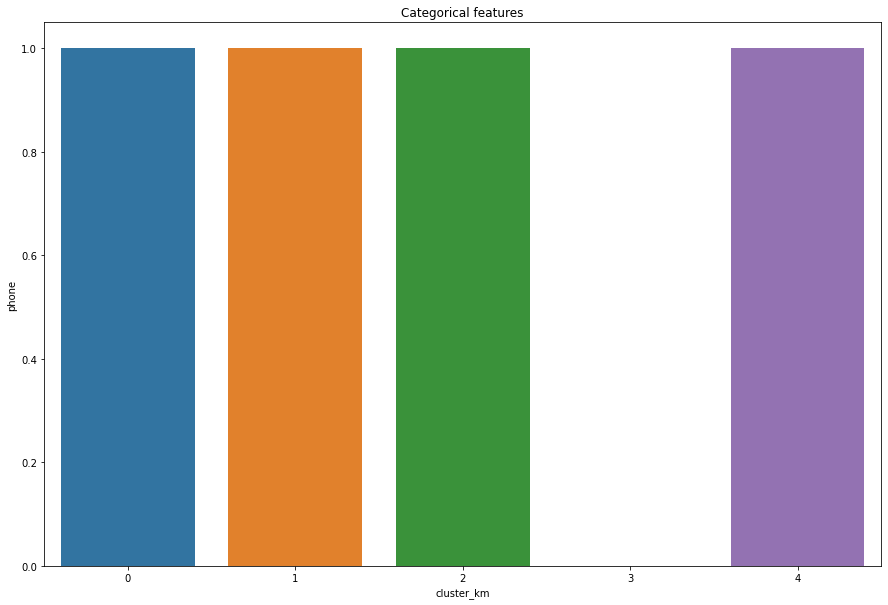

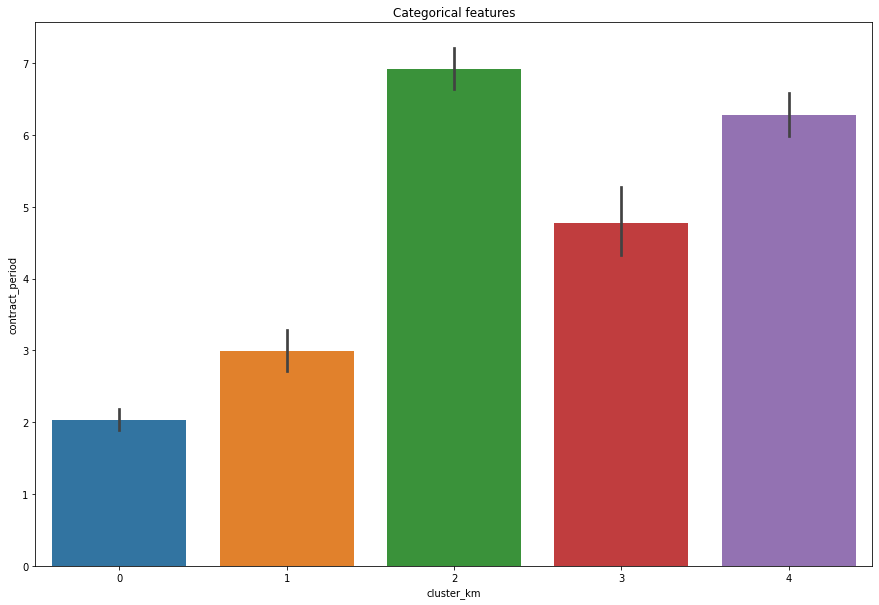

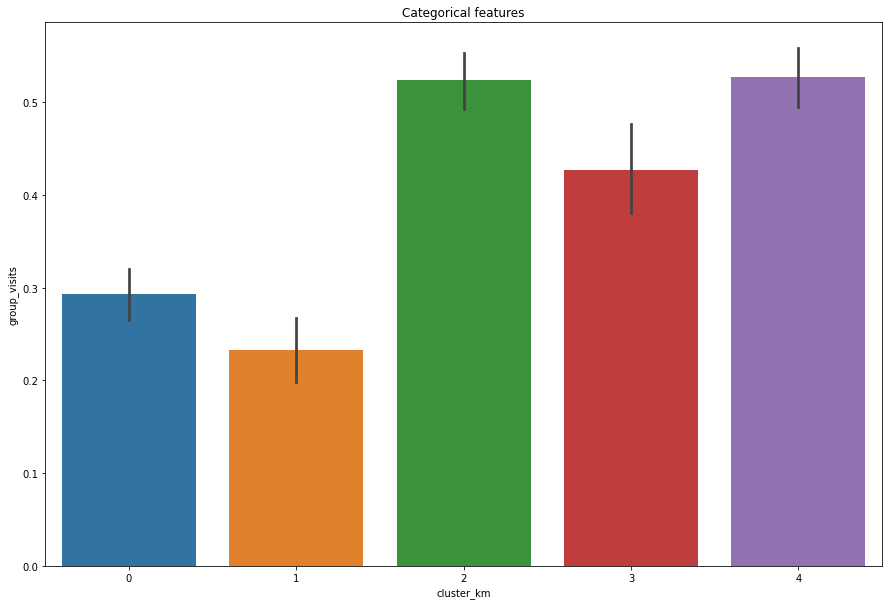

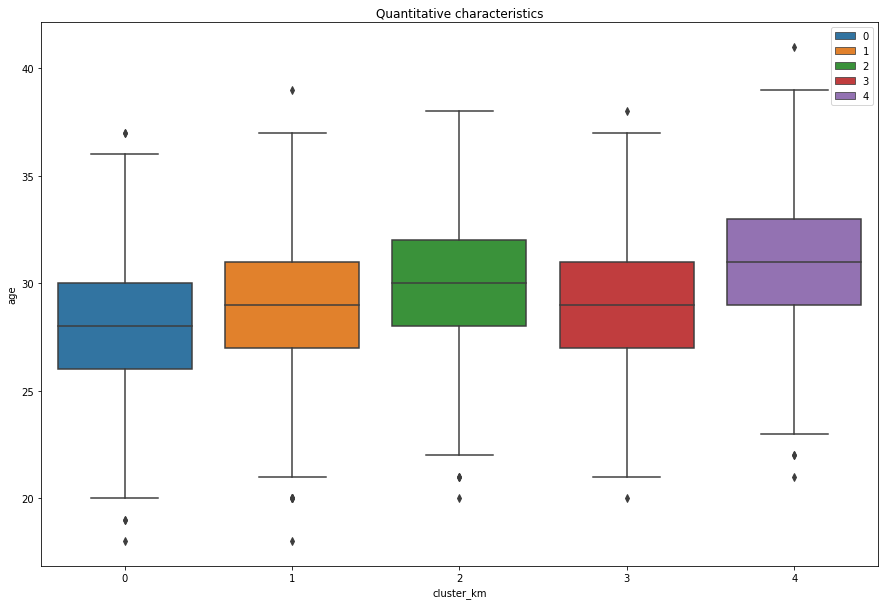

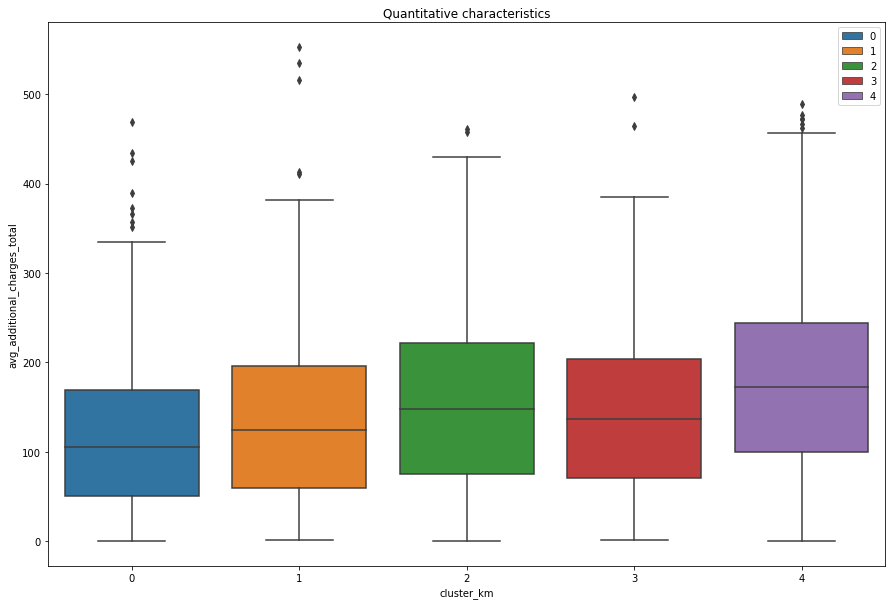

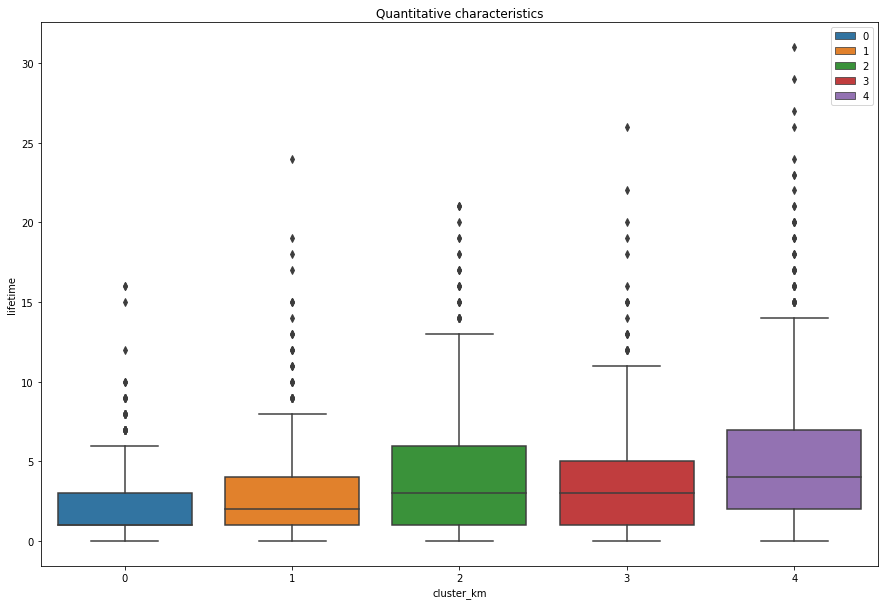

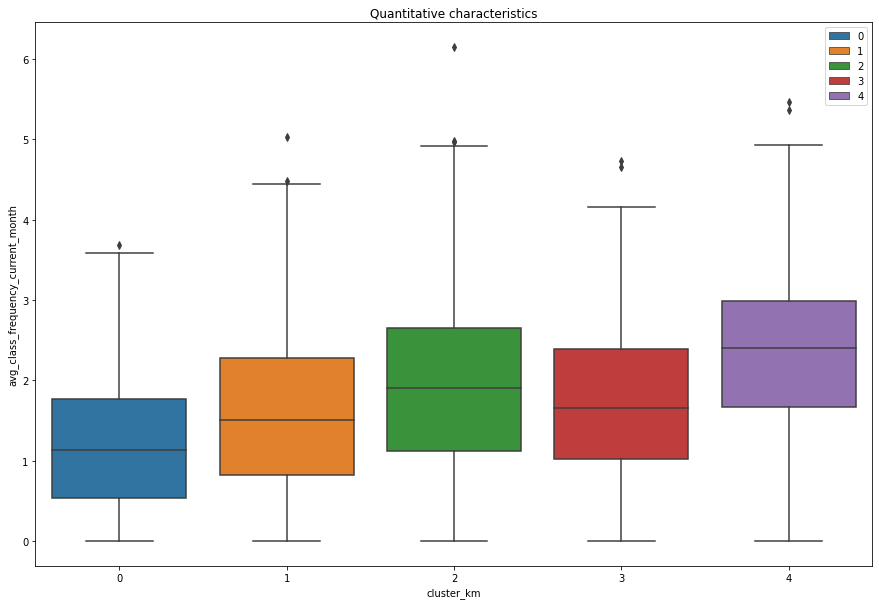

In [30]:
for feature in clients_new.drop(['cluster_km', 'churn'], axis = 1).columns:
    if feature not in categorical and feature not in ['contract_period', 'month_to_end_contract']:
        plt.figure(figsize = (15,10))
        plt.title('Quantitative characteristics')
        sns.boxplot(data = clients_new, x = 'cluster_km', y = feature, hue = 'cluster_km', dodge=False)
        plt.legend()
        plt.show()                 
    else:
        plt.figure(figsize = (15,10))
        plt.title('Categorical features')
        ax = sns.barplot(data = clients_new, x = 'cluster_km', y = feature)
        plt.show()

The graphs show that the partner parameter in different clusters has a different percentage of positive values, which means that it affects the formation of clusters. Similarly, contract_period, the cluster distribution of the age attribute is also quite different. The avg_additional_charges_total graph shows that the features are quite different across clusters. A similar pattern is observed with the avg_class_frequency_current_month attribute. According to the lifetime graph, we also see a difference in clusters, which confirms what was previously stated.

<a id = 'Step_4_3' > </a>
#### Counting the outflow share

In [31]:
clients_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.498155,1.000000,0.214022,0.069188,1.0,2.034133,0.293358,27.702030,118.024181,1.926199,1.201385,0.555351
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.496454,0.995947,0.890578,1.000000,1.0,6.910841,0.523810,29.600811,153.546885,4.282675,1.920546,0.119554
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
4,0.538071,0.995939,0.386802,0.010152,1.0,6.278173,0.526904,30.639594,178.787199,5.485279,2.348902,0.013198


We can see that almost all clusters differ in the average share of outflow. Almost all signs of the most resistant to outflow clusters are the largest on average.
We will characterize the groups that are most and least susceptible to outflow. Judging by the results obtained;
* The clients who are least likely to stop going to a fitness club live nearby, most of them are not employees of a partner company, often attend group classes, on average over 30 years old, their Lifetime on average is more than 5 months, and they also spend the most on additional services of the center(174,448) and visit the gym more than twice a week.
* As opposed, the group of clients most exposed to outflow is the youngest (about 27 years old), rarely attends group classes, spends the least on additional services(117.43), their lifetime is less than 2, and the frequency of visits per week is approximately one.

<a id = 'Step_5'> </a>
## Step 5. Formulate conclusions and recommendations for working with clients.

##### As a result of the analysis, several main conclusions can be drawn:
* To predict the outflow of customers, logistic regression should be used, it gives the most accurate and complete results.
* The most striking groups were identified, which are highly susceptible to outflow and vice versa. It turned out that most likely the outflow is most strongly influenced by such parameters as the frequency of visits, attendance of group classes, and the time since the first contact to the center.
Based on the above, the main finances and efforts of the marketing department should be directed to increasing these characteristics in the target group below 30 years.

##### Possible recommendations for reducing churn and interacting with customers:
* Creation bonus system based on the number of visits that can be spent on additional services of the fitness center to motivate customers to come more often and spend money on additional services.services, thus improving both parameters.
* Offer gifts for customers that will be given out upon reaching a certain visit period, for example, 6 months(for example, a training package).
* Add more possible activities to group classes by adding modern popular types of training in addition to the standard ones (martial arts, yoga, Pilates, dance, etc.)
* To maintain the loyalty of the group that is least susceptible to churn, personalized special offers can be offered.